In [26]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys

sys.path.append('../')
from functions import *
from trace_analysis import *
from pandas.plotting import scatter_matrix
from trace_analysis_cooja2 import *
from node import *
from plots import *


In [ ]:
directory=os.getcwd()
traces=directory+"/traces"
traces+="/normal"
#print(traces)
tracemask="grid9_normal_2019-02-11_17:51:17_"

In [31]:


def import_nodes_Cooja_2(directory,tracemask):
    #print(directory)
    #print(tracemask)
    files = []
    
    # load all files and extract IPs of nodes
    for file in os.listdir(directory):
        try:
            if file.startswith(tracemask) and file.index("routes"):
                continue
        except:
            files.append(file)
    
    
    packets_node = {}
    nodes = pd.DataFrame(columns=['node_id', 'rank'])
    for file in files:
        packets = pd.read_csv(directory + '/' + file,
                              sep=' |icmp_seq=|ttl=|time=',
                              na_filter=True,
                              header=None,
                              skiprows=1,
                              skipfooter=4,
                              usecols=[3, 5, 7, 9],
                              names=['node_id', 'seq', 'hop', 'rtt'],
                              engine='python').dropna().drop_duplicates()

        
        nodes.loc[len(nodes)] = [packets['node_id'][0], 64 - packets['hop'][0]]
        
        
        packets = packets.sort_values(by=['node_id', 'seq'], ascending=True, na_position='first')
        packets = packets[packets['rtt'] > 1]
        
        
        
        
        #print(data)
        packets_node[packets['node_id'][0]] = packets
        nodeList=[]
        
        for n in packets_node.keys():
            #print((packets_node[n]).head())
            pkts=packets_node[n].drop(["node_id","hop"],axis=1)
            hop=64-int(packets_node[n]["hop"][0])
            ip=packets_node[n]["node_id"][0]
            n=node(ip,hop,pkts)
            nodeList.append(n)
        
   
    return nodeList

In [32]:
def import_Cooja2(plots):
    data=[]
    
    for row in plots:
        
        #print("Importing ./"+row[0]+"/"+row[1])
        nodeList=import_nodes_Cooja_2(row[0],row[1])
        data.append(nodeList)

    return data


#packets_node

In [33]:
plots = [("traces/normal", 'grid9_normal_2019-02-11_17:51:17_'),
         ("traces/normal", 'grid9_normal_2019-02-11_20:22:01_'),
         ("traces/1bh-6", 'grid9_1bh-6_2019-02-11_20:48:08_'),
         ("traces/1bh-6", 'grid9_1bh-6_2019-02-11_21:03:19_'),
         ("traces/1bh-3", 'grid9_1bh-3_2019-02-12_14:47:14_')
        ]

data=import_Cooja2(plots)

Printing Big Plot for /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/cooja2-9nodes/


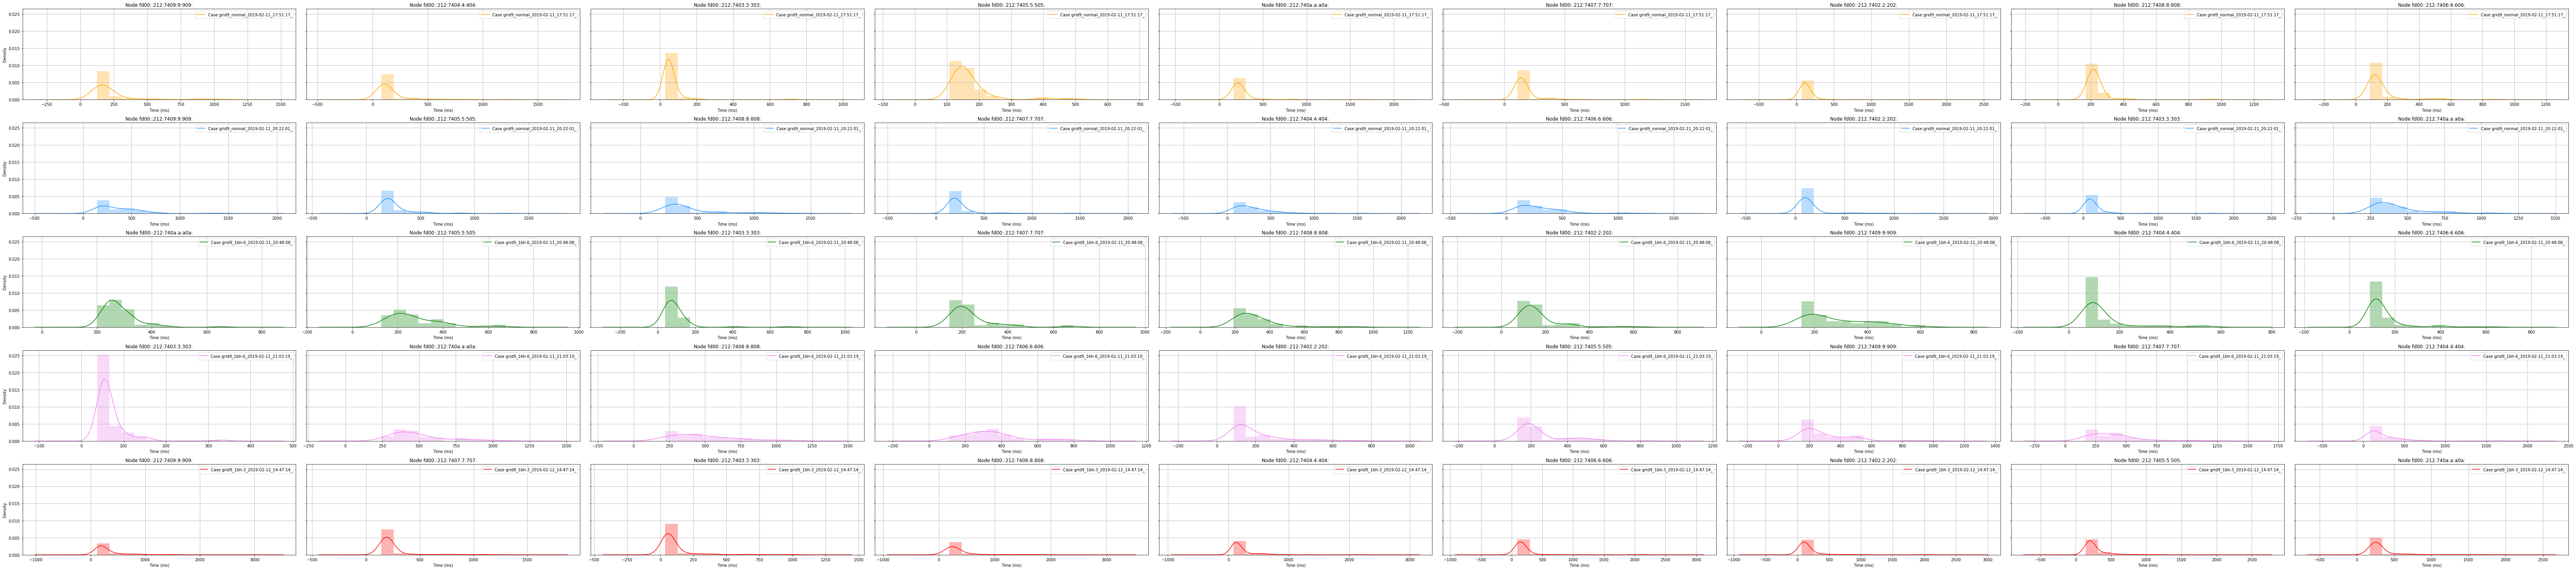

In [34]:
directory=os.getcwd()+"/"

cases=[
    "grid9_normal_2019-02-11_17:51:17_",
    'grid9_normal_2019-02-11_20:22:01_',
    'grid9_1bh-6_2019-02-11_20:48:08_',
    'grid9_1bh-6_2019-02-11_21:03:19_',
    'grid9_1bh-3_2019-02-12_14:47:14_'
]

colors = [ 'orange','dodgerblue', 'green','violet',"red","yellow","pink"]
printBigPlot(directory,data,(90,20),"Big Plot",colors,cases)